In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
nltk.download('vader_lexicon')
import tqdm



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\loris.deluca\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df = pd.read_csv("data/Reviews.csv")

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.shape

(568454, 10)

Important point to check is how the data is distributed. 

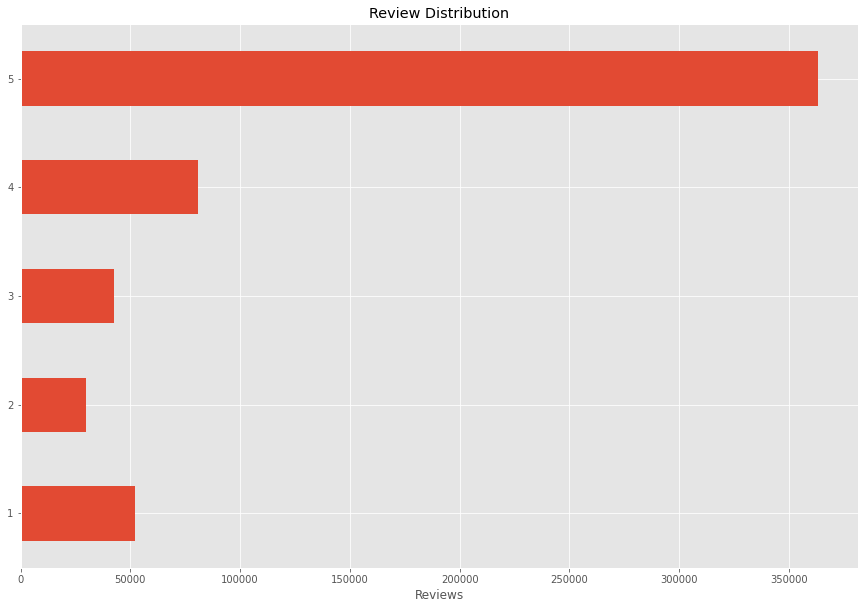

In [5]:
ax = df['Score'].value_counts()\
    .sort_index().plot(kind='barh',
    title='Review Distribution',
    figsize=(15,10))
ax.set_xlabel('Reviews')
plt.show()

Looks like the reviews are more prone towards positive ones. 

# VADER

### BOW Approach

In [6]:
sid = SIA()

In [7]:
df_vader = df.head(10000).copy()

In [8]:
def sentiment_vader(df_vader):
  result =  sid.polarity_scores(df_vader['Text'])
  df_vader['neu'] = result['neu']
  df_vader['pos'] = result['pos']
  df_vader['neg'] = result['neg']
  df_vader['compound'] = result['compound']
  return df_vader
  

In [13]:
df_vader = df_vader.apply(sentiment_vader, axis=1)

In [14]:
df_vader.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neu,pos,neg,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.695,0.305,0.000,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.862,0.000,0.138,-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.754,0.155,0.091,0.8265
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.000,0.000,0.000,0.0000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.552,0.448,0.000,0.9468


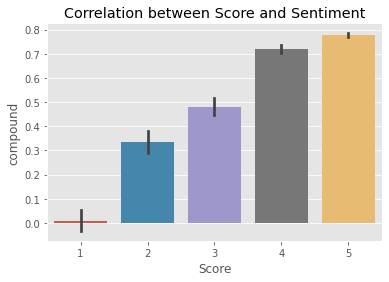

In [18]:
ax = sns.barplot(data=df_vader, x='Score', y='compound')
ax.set_title('Correlation between Score and Sentiment')
plt.show()

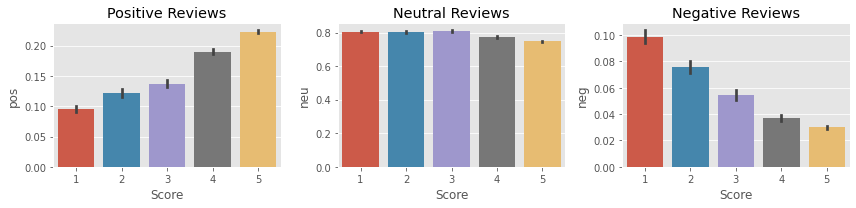

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(12,3))
sns.barplot(data=df_vader, x='Score', y='pos', ax=axs[0])
sns.barplot(data=df_vader, x='Score', y='neu', ax=axs[1])
sns.barplot(data=df_vader, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive Reviews')
axs[1].set_title('Neutral Reviews')
axs[2].set_title('Negative Reviews')
plt.tight_layout()
plt.show()


As the score goes higher, the sentiment goes higher, same for negative ones. 

# Hugging Face RoBERTA